# Analysis

In [2]:
import os
import pandas as pd
if "alertdata" not in os.listdir():
    os.chdir("../")
    
print(os.getcwd())

/home/evoila/bachelorarbeit/BA/pafa


In [3]:
df_3 = pd.read_csv("./experiment_data/scored_gpt-3.5-turbo.csv")
df_4 = pd.read_csv("./experiment_data/scored_gpt-4-turbo-preview.csv")
df_3.head(3)

,Unnamed: 0,id,alertname,difficulty,root_cause_real,solution_real,evidence_real,root_cause_pred,solution_pred,evidence_pred,tokens,completion_cnt,error,score,score_rc,score_s,score_e
0,0,bug_l1,BugTicketServiceOverloaded2,easy,Reopen ticket config changed.,Change reopen ticket config,todo,The root cause of the alert is the high number...,"To resolve the alert, investigate the code log...",The evidence found in the logs shows that ther...,28609,11,Final answer not reached,0.0,0,0,0
1,1,bug_l2,TicketCountHigh,easy,Tag got ignored.,Assign people to this tag,todo,The root cause of the high number of open tick...,Restarting the 'bugticketsvc-main-1' pod manua...,Logs show that a significant number of tickets...,25400,10,No error,0.4,0,0,2
2,2,bug_s1,BugTicketServiceOverloaded,difficult,Missconf in paymentsvc.,Change conf in paymentsvc,todo,The paymentsvc pod in the test-000 namespace i...,Restart the paymentsvc pod to fix the issue.,The paymentsvc pod in the test-000 namespace i...,24972,10,No error,0.7,1,0,1


In [23]:
# get all tokens, score pairings
tkns_scores_3 = df_3[["tokens", "score"]].values
tkns_scores_4 = df_4[["tokens", "score"]].values
# convert to lists of tuples that are sorted by tokens
tkns_scores_3 = sorted([tuple(x) for x in tkns_scores_3], key=lambda x: x[0])
tkns_scores_4 = sorted([tuple(x) for x in tkns_scores_4], key=lambda x: x[0])

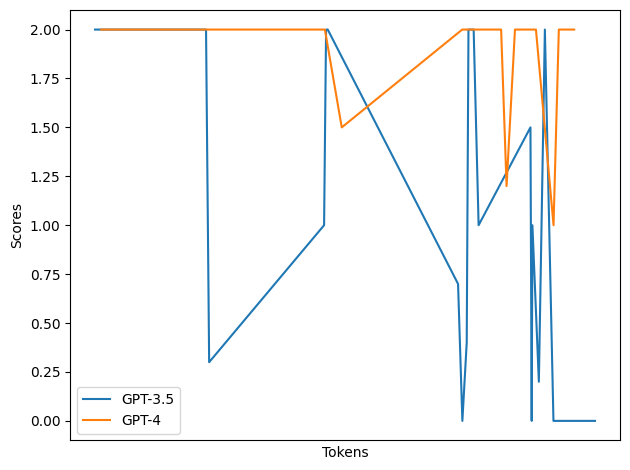

In [32]:
# use matplotlib and print in one graph the tokens as x axis and the scores as y axis
# use a legend to differentiate between the two models

import matplotlib.pyplot as plt
import numpy as np

tkns_3, scores_3 = zip(*tkns_scores_3)
tkns_4, scores_4 = zip(*tkns_scores_4)

plt.plot(tkns_3, scores_3, label="GPT-3.5")
plt.plot(tkns_4, scores_4, label="GPT-4")
plt.xlabel("Tokens")
plt.ylabel("Scores")
plt.legend()

# plot as points
plt.scatter(tkns_3, scores_3)
plt.scatter(tkns_4, scores_4)


# plt.savefig("/home/evoila/bachelorarbeit/BA/Thesis/Bachelorarbeit/res/token_scores.eps", format="eps")

`RBQL` ergab folgende Messwerte wo bei 3&4 für die jeweilige GPT Version stehen:

- Wie viele scores haben 0? 3: 4, 4: 0
- Wie viele scores haben 2? 3: 8, 4: 17
- Wie viele haben final answer nicht erreicht? 3: 8, 4: 11
- Was ist der avg. Score on denen die final answer nicht erreicht haben? 3: 0.71 $\pm$ 0.73, 4: 1.84 $\pm$ 0.35